# INTERN:Priyanshu Singh

## DATA SCIENCE AND BUSINESS ANALYRICS INTERN AT SPARKS FOUNDATION


## TASK-7: Stock Market prediction using Numerical and Textual And Analysis

In [103]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import seaborn as sns


### IMPORTING DATA AND NECESSARY LIBRARIES 

In [55]:
df=pdr.get_data_tiingo('AAPL',api_key='241991618dacded8e4fd14d7d07704c5bff19987')

C:\Users\priya\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [57]:
df.to_csv('AAPL.csv')

In [58]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-07-17 00:00:00+00:00  149.56  150.90  148.57  148.82  23243713   
       2017-07-18 00:00:00+00:00  150.08  150.13  148.67  149.20  17713795   
       2017-07-19 00:00:00+00:00  151.02  151.42  149.95  150.48  20615419   
       2017-07-20 00:00:00+00:00  150.34  151.74  150.19  151.50  17053326   
       2017-07-21 00:00:00+00:00  150.27  150.44  148.88  149.99  24671002   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-07-17 00:00:00+00:00  35.389423  35.706498  35.155165  35.214321   
       2017-07-18 00:00:00+00:00  35.512467  35.524298  35.178828  35.304238   
       2017-07-19 00:00:00+00:00  35.734893  35.829543  35.481706  35.607116   
       2017-07-20 00:00:00+00:00  35.573989  35.905262  35.538496  35.848473   
       2017-07-21 00:00:00+00:00  35.557426  35.597652  35.228519  35.491171   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-07-17 00:00:00+00:00   92974852      0.0          1.0  
       2017-07-18 00:00:00+00:00   70855180      0.0          1.0  
       2017-07-19 00:00:00+00:00   82461676      0.0          1.0  
       2017-07-20 00:00:00+00:00   68213304      0.0          1.0  
       2017-07-21 00:00:00+00:00   98684008      0.0          1.0

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1257 entries, ('AAPL', Timestamp('2017-07-17 00:00:00+0000', tz='UTC')) to ('AAPL', Timestamp('2022-07-13 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1257 non-null   float64
 1   high         1257 non-null   float64
 2   low          1257 non-null   float64
 3   open         1257 non-null   float64
 4   volume       1257 non-null   int64  
 5   adjClose     1257 non-null   float64
 6   adjHigh      1257 non-null   float64
 7   adjLow       1257 non-null   float64
 8   adjOpen      1257 non-null   float64
 9   adjVolume    1257 non-null   int64  
 10  divCash      1257 non-null   float64
 11  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 163.9+ KB


In [60]:
df.describe

<bound method NDFrame.describe of                                    close    high       low     open    volume  \
symbol date                                                                     
AAPL   2017-07-17 00:00:00+00:00  149.56  150.90  148.5700  148.820  23243713   
       2017-07-18 00:00:00+00:00  150.08  150.13  148.6700  149.200  17713795   
       2017-07-19 00:00:00+00:00  151.02  151.42  149.9500  150.480  20615419   
       2017-07-20 00:00:00+00:00  150.34  151.74  150.1900  151.500  17053326   
       2017-07-21 00:00:00+00:00  150.27  150.44  148.8800  149.990  24671002   
...                                  ...     ...       ...      ...       ...   
       2022-07-07 00:00:00+00:00  146.35  146.55  143.2800  143.290  66253709   
       2022-07-08 00:00:00+00:00  147.04  147.55  145.0000  145.265  64547798   
       2022-07-11 00:00:00+00:00  144.87  146.64  143.7800  145.670  63305113   
       2022-07-12 00:00:00+00:00  145.86  148.45  145.0500  145.760  775887

In [100]:
df.isnull().sum()
df1=df.reset_index()['close']

In [62]:
df1.shape

(1257,)

In [63]:
df1

0       149.56
1       150.08
2       151.02
3       150.34
4       150.27
         ...  
1252    146.35
1253    147.04
1254    144.87
1255    145.86
1256    145.49
Name: close, Length: 1257, dtype: float64

import matplotlib.pyplot as plt


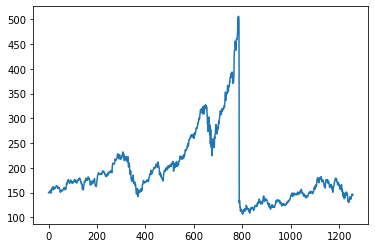

In [64]:
# plot baseline and predictions
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM  senstive to sacle of data

In [65]:
import numpy as np

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [101]:
len(df1)

1257

### this is timeseries data,cross validation and random seed works on categorical data best

### so we divided data into train and test data  takeing some preivous time datas as train and later data as test data

In [73]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_Data=df1[0:training_size,:]
test_Data=df1[training_size:len(df1),:1]

In [74]:
training_size

817

In [75]:
test_size

440

In [20]:
train_Data

array([[1.07000626e-01],
       [1.08303068e-01],
       [1.10657483e-01],
       [1.08954289e-01],
       [1.08778961e-01],
       [1.13337508e-01],
       [1.14965560e-01],
       [1.16768942e-01],
       [1.09505322e-01],
       [1.06850344e-01],
       [1.04921728e-01],
       [1.08227927e-01],
       [1.25986224e-01],
       [1.22053851e-01],
       [1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],


timeseires data = 100,150 170,140,,159,165,200,185

timesteps to be calcualted for predicting the future sotck price

f1      f2      f3    o/p

100  150  170   140

159  165  200   185

In [21]:
import numpy

def dataset_func(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return numpy.array(datax),numpy.array(datay)

In [22]:
time_step=100
x_train,y_train=dataset_func(train_Data,time_step)
x_test,y_test=dataset_func(test_Data,time_step)


In [53]:
print(x_train.shape)

(716, 100, 1)


In [24]:
print(y_train.shape)

(716,)


In [25]:
print(x_test.shape,y_test.shape)

(339, 100) (339,)


In [26]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [27]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [28]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

### created LSTM model for prediction using layers in differnet sizes

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32,verbose=1)

Epoch 1/5
23/23 [==============================] - 22s 326ms/step - loss: 0.0295 - val_loss: 0.0078
Epoch 2/5
23/23 [==============================] - 4s 171ms/step - loss: 0.0103 - val_loss: 0.0014
Epoch 3/5
23/23 [==============================] - 3s 152ms/step - loss: 0.0093 - val_loss: 4.5819e-04
Epoch 4/5
23/23 [==============================] - 3s 144ms/step - loss: 0.0070 - val_loss: 3.0291e-04
Epoch 5/5
23/23 [==============================] - 4s 194ms/step - loss: 0.0058 - val_loss: 5.4393e-04


In [32]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 1s 47ms/step


In [33]:
import math


### finding the error in prediction of test data and predicted value

In [34]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.07003971565120728

In [35]:

math.sqrt(mean_squared_error(y_test,test_predict))

0.02332221126931737

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting


In [37]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


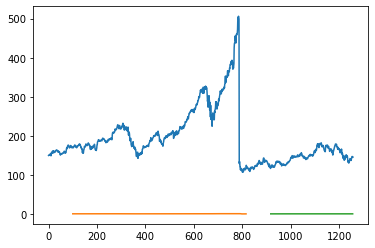

In [38]:
# plot baseline and predictions
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_Data)

440

In [77]:
x_input=test_Data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [78]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.15539135879774574,
 0.15143393863494048,
 0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.12

In [79]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    



[0.1019992]
101
1 day input [0.15143394 0.14396994 0.13332498 0.14001252 0.14529743 0.1459737
 0.14116468 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763
 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166
 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0

In [93]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [94]:
len(df1)

1257

## plotting graph of predicted output of stock for next 30 days in different color/visualisation

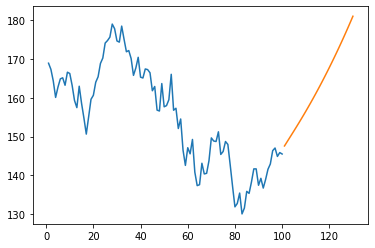

In [96]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

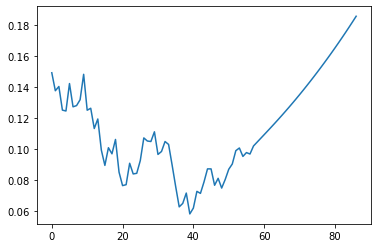

In [97]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

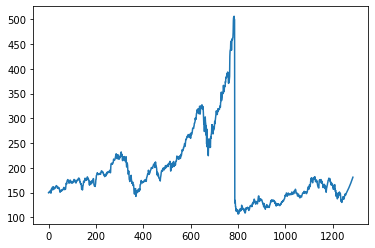

In [98]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)